# 1 - Introdução do que faremos

## 1.1 - Introdução

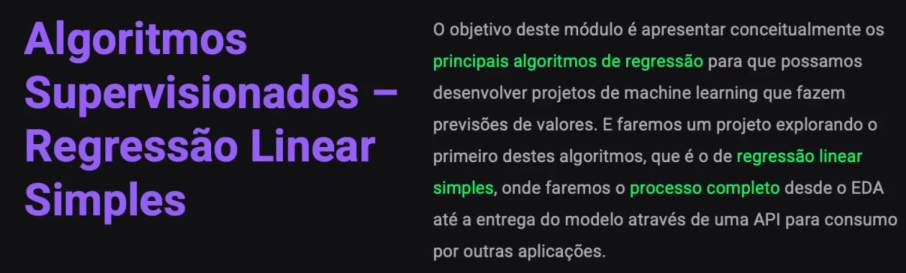

## 1.2 - O que é Análise de Regressão
A análise de regressão é uma abordagem estatística que busca investigar e quantificar a relação entre variáveis.<br>Ela é usada para entender como uma variável dependente está relacionada a uma ou mais variáveis independentes.<br>Através dessa técnica, podemos construir um modelo matemático, geralmente na forma de uma equação linear, para estimar os parâmetros e entender como as mudanças nas variáveis independentes afetam a variável dependente. Isso é útil para fazer previsões de valores e tomar decisões embasadas em evidências.

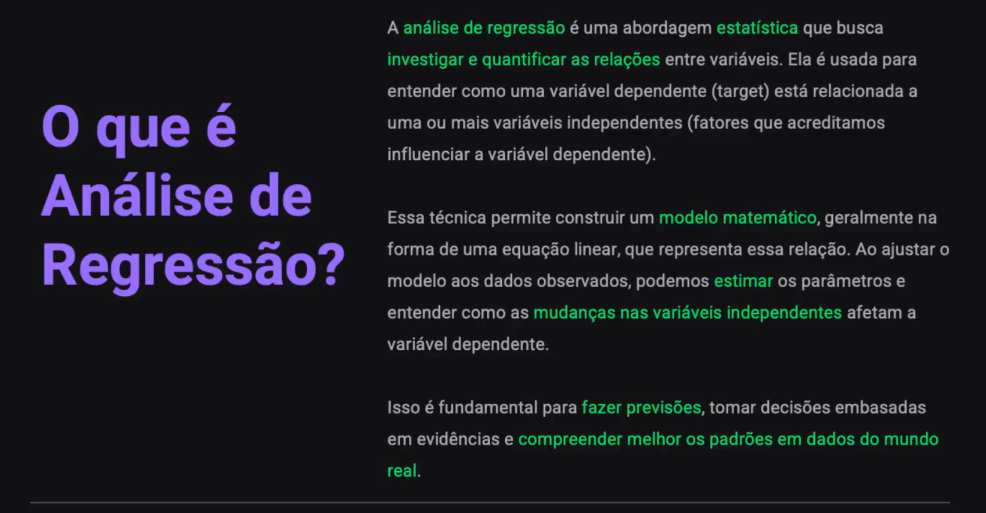

## 1.3 - Tipos de Regressão
Exploramos os principais tipos de regressão utilizados no mercado. 
- Começaremos com a <u>regressão linear simples</u>, que envolve uma variável independente e uma variável dependente, representada por uma linha reta. 
- Em seguida, discutiremos a <u>regressão linear múltipla</u>, que utiliza várias variáveis independentes para prever uma variável dependente, resultando em um modelo mais complexo. 
- Também abordaremos a <u>regressão logística</u>, que é usada para prever probabilidades em problemas de classificação. 
- Exploraremos diferentes tipos de <u>classificação, como binária e multinomial.</u> 
- Além disso, discutiremos a <u>regressão logística ordinal</u>, que é usada quando há uma ordem nas classes. 
- Outros tipos de regressão abordados incluem a <u>regressão do tipo beta</u>, usada quando a variável independente está restrita a um intervalo entre zero e um, e a <u>regressão gama</u>, usada quando os dados não seguem uma distribuição normal e exibem uma simetria positiva. 
- Também mencionaremos as <u>técnicas de regularização</u>, como Ridge, Lasso e ElasticNet, que são aplicadas em modelos de regressão linear para lidar com multicolinearidade e overfitting. 
- Por fim, discutiremos a <u>regressão polinomial</u>, que modela relações não lineares entre as variáveis, e a <u>regressão de Poisson</u>, usada para modelar problemas de contagem.

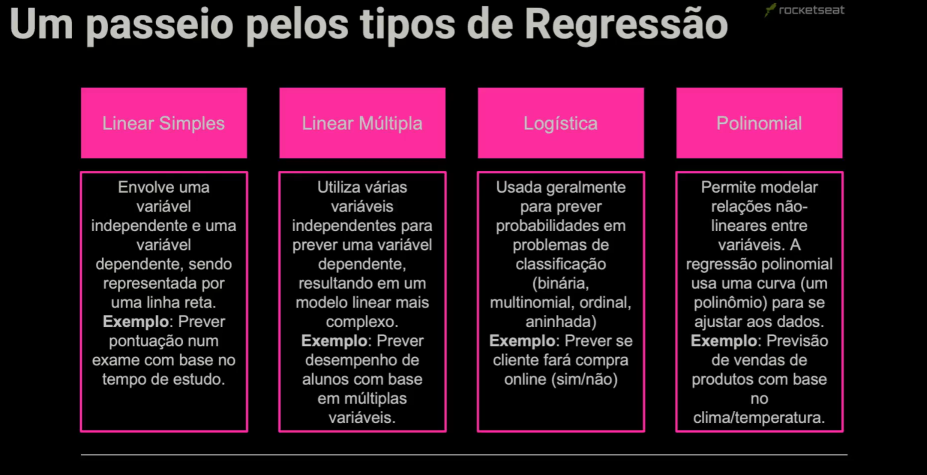

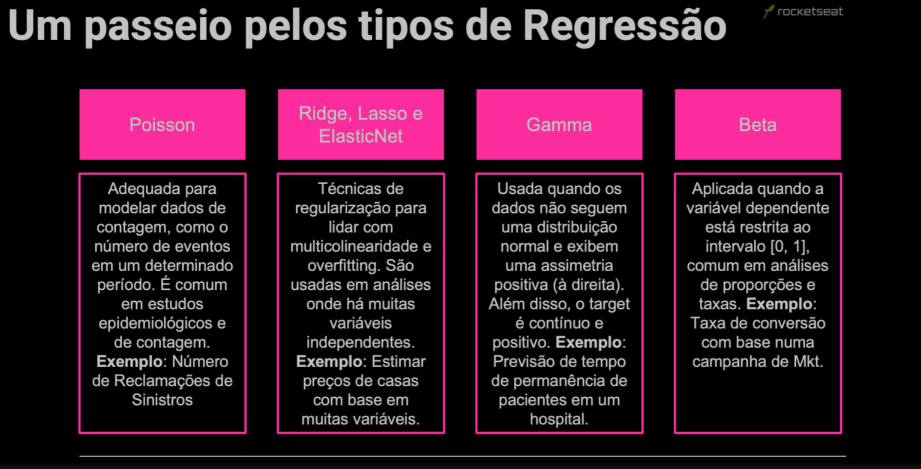

# 2 - Apresentação do projeto
Vamos desenvolver um projeto utilizando uma plataforma online de educação.<br>
O objetivo é avaliar se a quantidade de horas que os alunos passam estudando influencia na pontuação do teste final.<br>
- Para isso, vamos treinar um algoritmo de regressão linear simples para prever a pontuação do teste com base nas horas de estudo.
- Vamos começar carregando os dados em um DataFrame do Pandas e realizar uma análise exploratória dos dados. 
- Em seguida, vamos treinar o algoritmo, validar o modelo e salvar para criar uma API que possa ser utilizada por outras aplicações. 
<p>A regressão linear simples utiliza a equação da reta para prever uma variável dependente com base em uma variável independente. O intercepto é o ponto onde a reta cruza o eixo Y, e o coeficiente é a inclinação da reta.

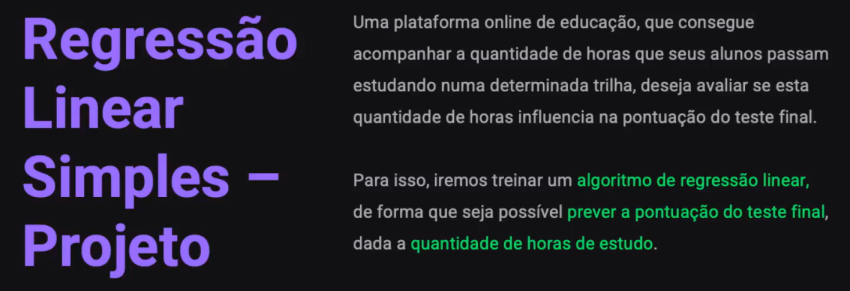

## 2.1 - Etapas do Processo do Projeto

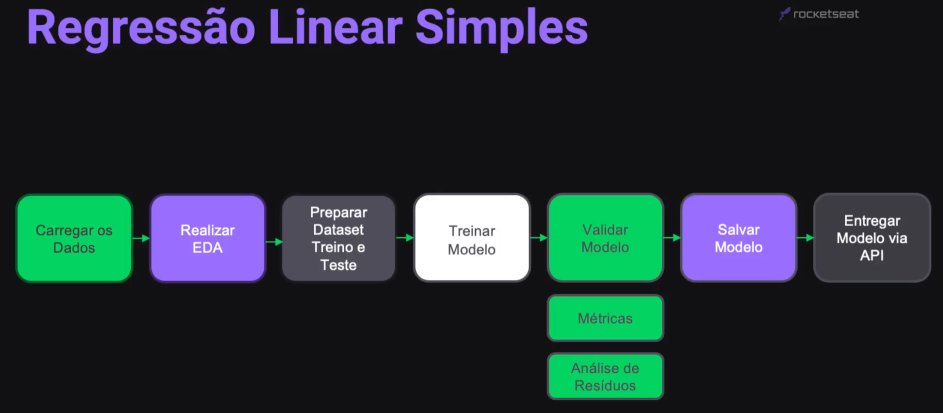

## 2.2 - Equação da Reta

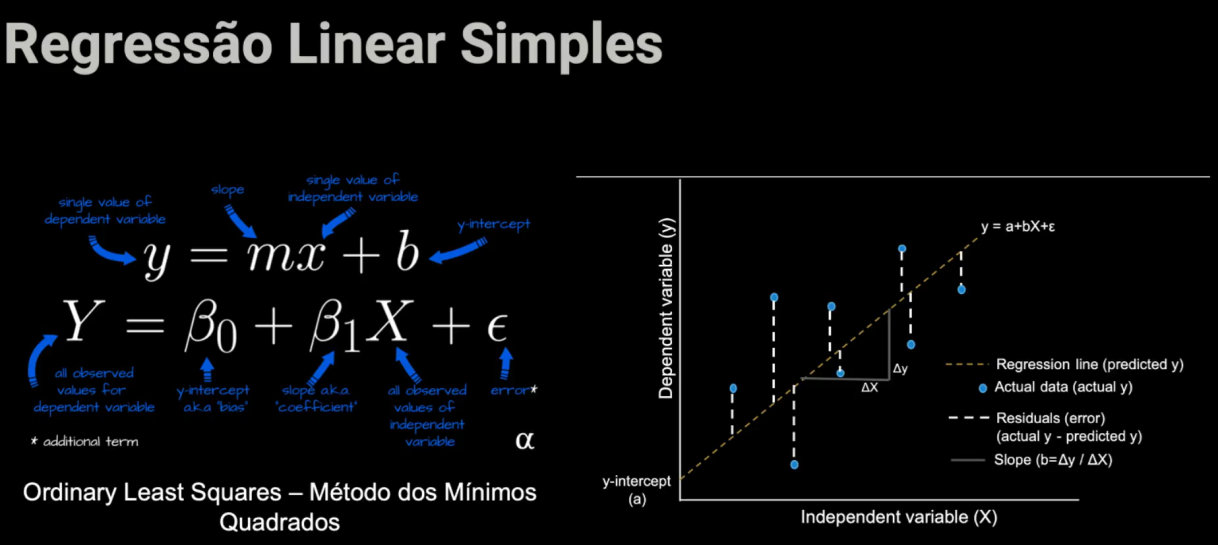

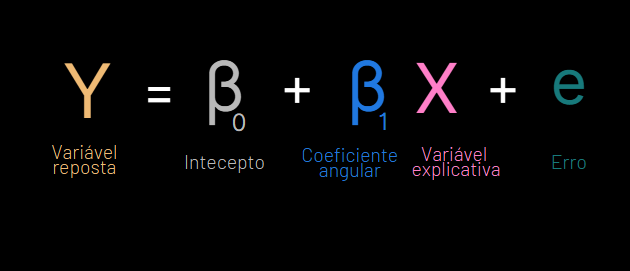

# 3 - Análise Exploratória de Dados (EDA)

## 3.1 - Importando as Bibliotecas

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from scipy.stats import shapiro, kstest, probplot, zscore
#import pingouin as pg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from pydantic import BaseModel
#from fastapi import FastAPI
#import uvicorn

## 3.2 - Carga dos Dados

In [2]:
# Abrir o dataset
df_pontuacao = pd.read_csv('pontuacao_teste.csv')
df_pontuacao.head(2)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55


In [3]:
# Informações DataFrame
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


## 3.3 - Análise Exploratória dos Dados (EDA)
 - 1º Começaremos analisando as medidas estatísticas das variáveis, como média, mediana e desvio padrão. 
 - 2º Utilizaremos um gráfico de dispersão para visualizar a relação entre as variáveis. Observamos que há uma relação forte entre as horas de estudo e a pontuação no teste, mas não é uma relação linear perfeita. 
 - 3º Verificaremos que não há outliers nas horas de estudo ou na pontuação, usando o boxplot. 
 - 4º Calcularemos a correlação entre as variáveis e constatamos que há uma correlação forte entre elas. 
 - 5º Analisaremos a distribuição das variáveis usando histogramas e observaremos que há uma concentração maior de dados acima de 40 horas de estudo. 
 <p>Com base nessas análises, concluímos que um modelo de regressão linear simples pode ser adequado para prever a pontuação no teste com base nas horas de estudo.

In [4]:
# Medidas Estatísticas das Variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

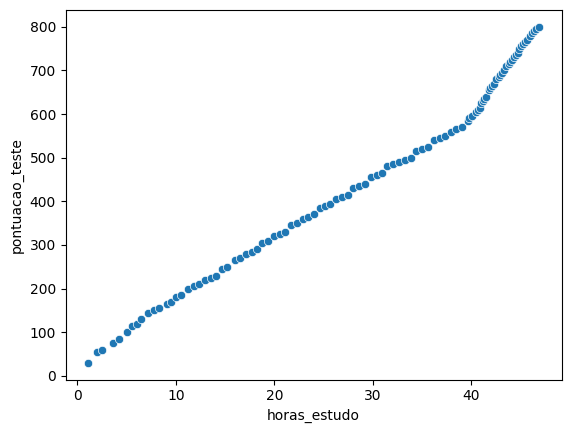

In [5]:
# Plot de Dispersão
# X = horas_estudo
# y = pontuacao_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

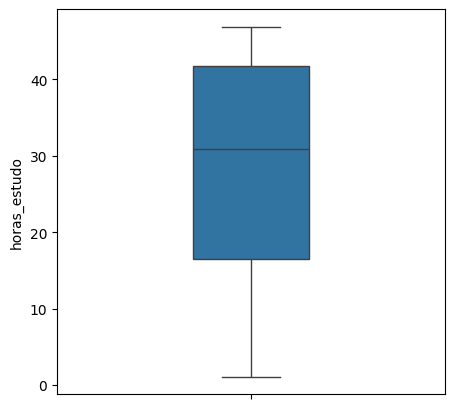

In [6]:
# Verificar se temos Outliers na Variável Independente X
ax = sns.boxplot(df_pontuacao, y='horas_estudo', width=0.3)
ax.figure.set_size_inches(5, 5)

<Axes: ylabel='pontuacao_teste'>

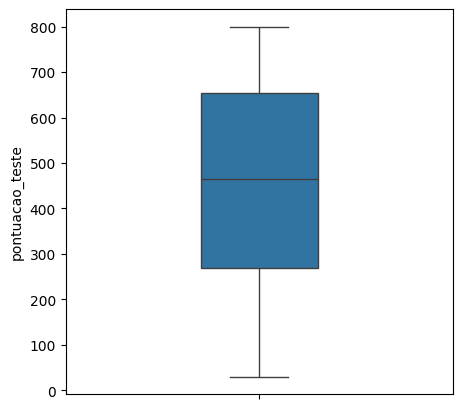

In [7]:
# Verificar se temos Outliers na Variável dependente y
ax = sns.boxplot(df_pontuacao, y='pontuacao_teste', width=0.3)
ax.figure.set_size_inches(5, 5)
ax

<Axes: >

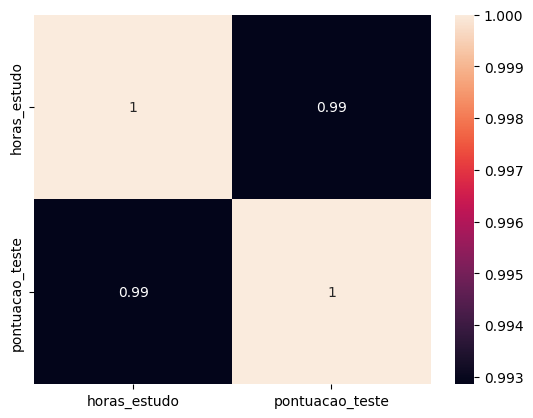

In [8]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

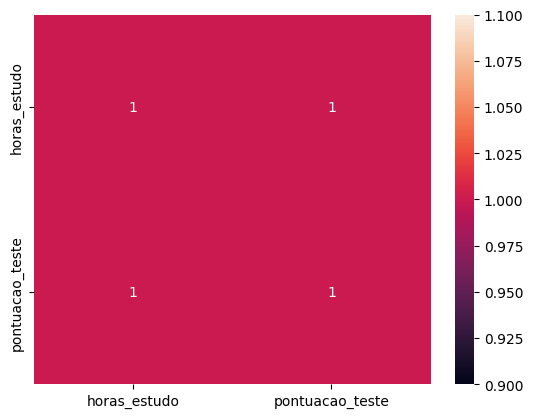

In [9]:
# Verificar Correlação - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

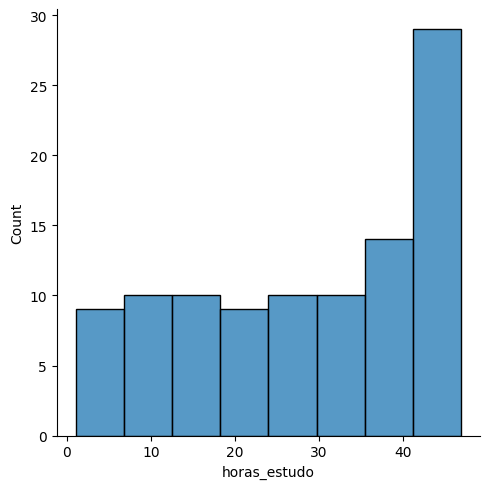

In [10]:
# Histograma das Variáveis independentes
sns.displot(df_pontuacao, x='horas_estudo')

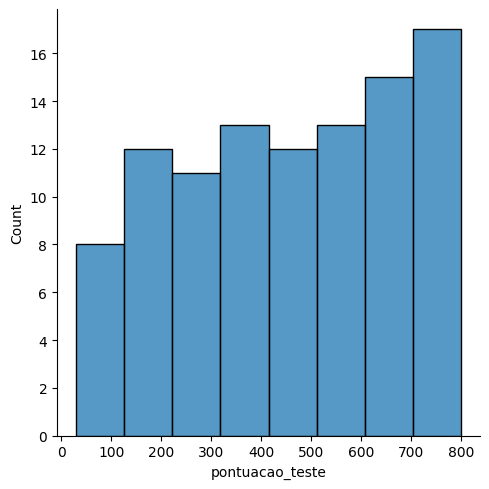

In [11]:
# Histograma das Variáveis dependentes
sns.displot(df_pontuacao, x='pontuacao_teste')

# 4 - Treinamento do Modelo
Vamos preparar o modelo para ser treinado. 
- A primeira etapa é dividir os dados entre treino e teste. Para isso, criamos duas estruturas para armazenar as variáveis independentes (X) e dependentes (Y). 
- Em seguida, utilizamos a função train_test_split() para dividir o dataset em treino e teste, definindo que 30% dos dados serão usados para teste e 70% para treinamento. 
- Após a divisão, instanciamos o modelo de regressão linear e treinamos o modelo utilizando o conjunto de treinamento. 
- Por fim, imprimimos a equação da reta resultante, que representa a relação entre as variáveis X e Y.

## 4.1 - Dividir dataset em Treino e Teste
**Dica:** Quando falamos de um modelo, que tem apenas uma feature (regressão linear simples), ou seja, uma variável independente pra prever a dependente não fazemos a divisão de forma direta atribuindo as variáveis e fazendo o drop nas que não for usada. Em vez disso precisamos ajustar o Shape. 

In [16]:
# reshape do pandas por ter apenas uma feature
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

In [17]:
#Divisao em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1024)

In [18]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [19]:
# Treinar o modelo, para gerar uma relação entre essas duas variáveis (vai gerar o coeficiente e o intercept da reta)
reg_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# imprimir a equação da reta: y = aX + b
coef = reg_model.coef_[0][0]
intercept = reg_model.intercept_[0]
print("A equação da reta é: y = {:4f}X + {:4f}".format(coef, intercept))

A equação da reta é: y = 15.628015X + 6.323294


# 5 - Validação do Modelo

## 5.1 - Análise de Métricas - MAE e MSE:
- Faremos as métricas e análise de resíduos. 
- Calcularemos os valores preditos com base no conjunto de testes para verificar se o modelo está fazendo boas previsões em dados não observados durante o treinamento. 
- Usaremos métricas como <u>R-squared</u>, que mede a proporção da variação explicada pela variável independente, e <u>Mean Absolute Error (MAE)</u>, que calcula a diferença média entre os valores preditos e os valores reais. 
- <u>O MAE é uma métrica fácil de interpretar e menos sensível a outliers.</u>

In [21]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

### 5.1.1 - Métrica R-squared ou Coeficiente de Determinação (métrica focada em comparação, o quanto uma coisa está influenciando na outra)
- O valor dessa métrica é de 0 a 1, o objetico é chegar o mais próximo de 1
- **R2** representa a proporção na variação da variável dependente que é explicada pela variável independente

In [22]:
# Comparar y_pred(predição) com o y_test (valor real para um determinado X)
# Calcular R2
r2_score(y_test, y_pred)

0.9906689776041046

### 5.1.2 - MAE (Mean Absolute Error): (Métrica mais focada em erro, tira uma média da diferença entre valor predito e valor de teste)
- MAE  =  Media (y_test - y_pred)
- Fácil de interpretar
- É menos sensível a outliers

In [23]:
# Calcular métrica MAE
mean_absolute_error(y_test, y_pred)

19.223125718697037

### 5.1.3 - MSE (Mean Squared Error)
- MSE = Media (y_test - y_pred)2
- Não é uma mpetrica fácil de interpretar
- MSE é mais sensível a outliers e penaliza grandes erros

In [24]:
# Calcular métrica MAE
mean_squared_error(y_test, y_pred)

511.89493669145287

## 5.2 - Análise de Métricas - RMSE (Root Mean Squared Error)
- Faremos métricas de avaliação de modelos de regressão. 
- O RMSE (Root Mean Squared Error), é uma métrica que penaliza os grandes erros, mas é fácil de interpretar (MAE e MSE)
- O cálculo do RMSE é semelhante ao MSE (Mean Squared Error), mas com a diferença de que é aplicada uma raiz quadrada no resultado. 
- Veremos como calcular o RMSE e como interpretar seus valores. 
- Faremos uma análise gráfica simples para visualizar os dados preditos e reais do conjunto de teste. 
- Concluímos que é importante observar as diferenças entre os valores preditos e reais, tanto através das métricas quanto visualmente, para avaliar a performance do modelo.

In [25]:
# Calcular métrica RMSE
root_mean_squared_error(y_test, y_pred)

22.62509528579831

### 5.2.1 - Análise Gráfica: Dados Preditos X Dados Reais


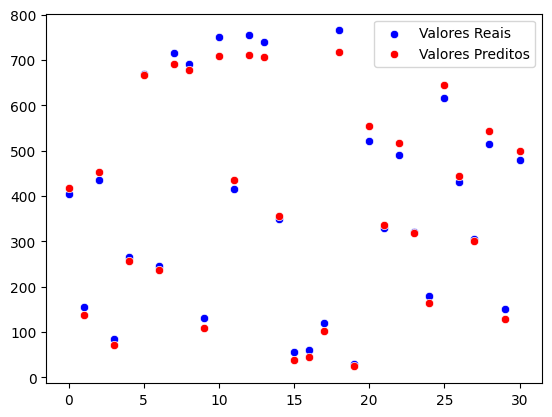

In [23]:
x_axis = range(len(y_test))
plt.Figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

## 5.3 - Análise Gráfica de Resíduos
- Vamos realizar a análise de resíduos para validar nosso modelo de regressão. 
- Os resíduos são os erros do modelo, ou seja, a diferença entre os valores reais e os valores previstos. 
- Vamos calcular os resíduos e convertê-los para uma escala padronizada. 
- Em seguida, faremos uma análise gráfica dos resíduos para verificar a linearidade e a homogeneidade das variâncias. 
- Observamos que os resíduos não estão totalmente dentro do intervalo esperado para a linearidade e que há padrões nos dados, indicando que o modelo pode não ser adequado. 
- Além disso, faremos testes estatísticos de normalidade nos resíduos.

### 5.3.1 - Calcular resíduos
Resíduo é um erro que é dado pela <u>diferença entre o valor real da varíável (y_test) e a variável predita (y_pred)</u>: y_test - y_pred

In [24]:
# Calcular Resíduos
residuos = y_test - y_pred

### 5.3.2 - Converter para uma escala padronizada (standardization)

In [25]:
# Converter os resíduos para uma escala padronizada (standardization)
# Para cada elemento de um conjunto (X - media) / desvio_padrao
residuos_std = zscore(residuos)

### 5.3.3 - Depois de convertê-los para uma escala padronizada faremos a Análise Gráfica com testes
- Primeiro teste no gráfico: Verificar a linearidade do modelo: Se os Resíduos estiverem entre -2 e +2 (na escala padrão) - indica linearidade dos resíduos
- Segundo teste no gráfico: Verificar a homogeneidade das variâncias (Homocedasticidade): Se os valores estiver em torno da reta, temos homocedasticidade, caso contrário se tivermos alguma tendência ou padrão (forma de um cone ou funil), há Heterocedastidade.

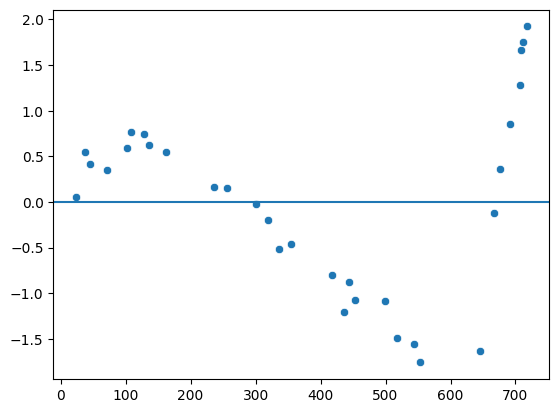

In [26]:
# Primeira Validação Gráfica (Ver se há padrões que nos ajudam a fazer boas predições): Observaremos que estamos mais para um cenário de Heterocedasticidade
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

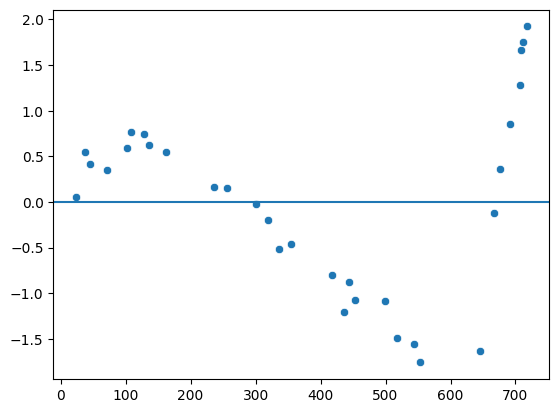

In [27]:
# Segunda Validação Gráfica (Se os Resíduos seguem uma distribuição normal)
# Gráfico QQ (Quantile-Quantile) plot, avalia se uma amostra segue uma distribuição normal
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

In [28]:
# Não consegui instalar a biblioteca Pingouin, depois ver porque
#pg.qqplot(residuos_std, dist='norm', confidence=0.95)
#plt.xlabel('Quantis Teóricos')
#plt.ylabel('Residuos na escala padrão')
#plt.show()

Mas o resultamdo seria como o gráfico abaixo

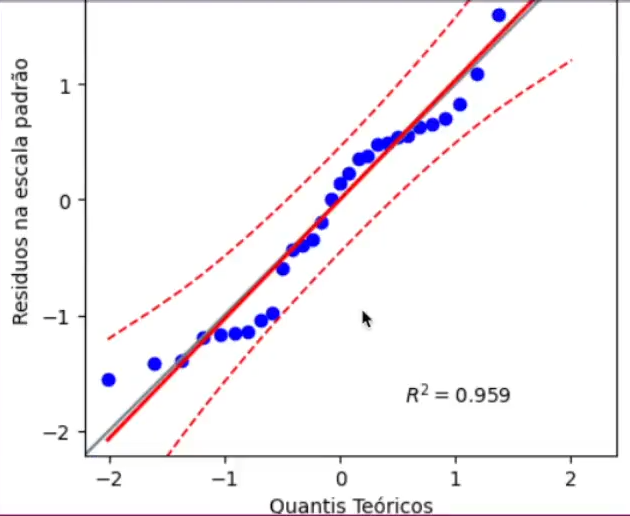

## 5.4 - Teste de Normalidade de resíduos
- Veremos a importância da validação técnica e de negócio em modelos de regressão linear. 
- Realizamos dois testes estatísticos de normalidade: o <u>teste de Shapiro-Wilks</u> e o <u>teste de Kolmogorov-Smirnov.</u> 
- O teste de Shapiro-Wilks nos permite verificar se os resíduos do modelo seguem uma distribuição normal. 
- Já o teste de Kolmogorov-Smirnov nos ajuda a validar se os resíduos seguem uma distribuição normal específica, como a distribuição normal. 
- Analisamos os resultados desses testes, considerando o valor de p-valor. 
- Se o p-valor for maior que 0.05, não rejeitamos a hipótese nula de que os resíduos seguem uma distribuição normal. Caso contrário, rejeitamos a hipótese nula. 
- Discutimos também outras abordagens que podem ser utilizadas para melhorar o modelo, como a obtenção de mais dados e a utilização de validação cruzada com K-fold. 
- Por fim, ressaltamos a importância de validar o modelo com especialistas no domínio do problema e considerar outras variáveis que possam explicar melhor os resultados.<br><br>
- Hipótese nula(H0): segue uma distribuição normal
- H1: Não segue uma distribuição normal
- Se o P-valor > 0.05 não rejeitamos H0, caso contrário sim

### 5.4.1 - Teste de Normalidade Shapiro Wilk
- Hipótese nula(H0): segue uma distribuição normal
- H1: Não segue uma distribuição normal
- Se o P-valor > 0.05 não rejeitamos H0, caso contrário sim

In [ ]:
# P-Valor = 0.40. Pelo teste de Shapiro Wilk, não rejeitamos o H0 e os resíduos seguem uma distribuição normal'
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print('Estatística do teste: {} e P-Valor: {}'.format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.965586245059967 e P-Valor: 0.4064927101135254


### 5.4.2 - Teste de Normalidade Kolmogorov-Smirnov

In [30]:
# P-Valor = 0.40. Pelo teste de Shapiro Wilk, não rejeitamos o H0 e os resíduos seguem uma distribuição normal
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print('Estatística do teste: {} e P-Valor: {}'.format(stat_ks, p_valor_ks))

Estatística do teste: 0.6083983376724129 e P-Valor: 1.537557969456065e-11


# 6 - Fazendo Predições

## 6.1 - Fazer predições e salvar modelo
- Veremos como fazer predições com um modelo de regressão linear. 
- Primeiro, calculamos a pontuação prevista para um determinado número de horas de estudo, usando o método predict do modelo. 
- Em seguida, discutimos a importância de avaliar o erro das previsões e como isso pode afetar a tomada de decisões. 
- Também exploramos como inverter a equação da reta para determinar quantas horas de estudo são necessárias para atingir uma determinada pontuação-alvo. 
- Por fim, aprendemos a salvar o modelo treinado em um arquivo para uso posterior.

###  6.1.1 - Pontuação prevista

In [31]:
# Se eu estudar 30.4 horas, qual pontuação prevista pelo modelo (y)?
reg_model.predict([[30.4]])

array([[481.4149417]])

###  6.1.2 - Quantidade de horas prevista

In [32]:
# Fazendo o contrário: Quero tirar 600 pontos (pelo modelo), quantas horas (x) tenho que estudar?
# Equação da Reta: y = ax + b 
#                 ax = y - b
#                  x = (y - b)/a
((600-reg_model.intercept_[0])/reg_model.coef_[0][0])

37.987979683801214

### 6.1.3 - Salvar Modelo para usar depois

In [33]:
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']

# 7 - Entregar modelo como API
- Vamos criar uma API utilizando o FastAPI para disponibilizar um modelo de regressão. 
- Primeiro, importamos as bibliotecas necessárias, como o Pydantic para validação dos dados de entrada, o FastAPI para criação da API e o JobLib para carregar o modelo salvo. 
- Em seguida, criamos uma instância do FastAPI e uma classe para validar os dados de entrada da API. 
- Carregamos o modelo e criamos uma função para realizar a predição. 
- Preparamos os dados de entrada, realizamos a predição e retornamos o resultado em formato JSON. 
- Por fim, utilizamos o Uvicorn para rodar o servidor e disponibilizar a API.

In [ ]:
# Não foi possível instalar essas bibliotecas

#from fastapi import FastAPI
#import uvicorn
#import pingouin as pg